In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading libraries from SK-Learn.......
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Loading Ensemble Libraries...
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Model selection libraries.....
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.....
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings....
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the csv file......
df=pd.read_csv('avacado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Understanding the Dataset...  

1) Features/Attributes: 
   >> Date - The date of the observation           
   >> AveragePrice - the average price of a single avocado              
   >> type - conventional or organic            
   >> year - the year                    
   >> Region - the city or region of the observation            
   >> Total Volume - Total number of avocados sold                      
   >> 4046 - Total number of avocados with PLU 4046 sold                    
   >> 4225 - Total number of avocados with PLU 4225 sold                 
   >> 4770 - Total number of avocados with PLU 4770 sold           
   
2) Label/Target:                             
   >> According to the instructions we have to perform both task in the same file...                        
         TASK 1:                                   
             >>Target is "Average Price" and it is a continuous data, thus we have to perform Different Regression Models.         
         TASK 2:                                                                         
             >> Target is "Region" and it is a categorical data, thus we have to perform Different Classification                 Models.       
             
EDA will be almost same for both Tasks, thus  after EDA i will Perform Task 1 first and Later Task 2.....

# EDA (Exploratory Data Analysis).....

In [3]:
# Dropping Unnamed Feature as it is only index numbers and dropping year column......
df_avocado=df.drop(['Unnamed: 0','year'],axis=1)
df_avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking the number of null values.........
df_avocado.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
region          14951
dtype: int64

In [5]:
# Checking the last few rows........
df_avocado.tail(10)
# So as we can see a lot of null values are present in the DataFrame......

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
16458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dropping null values ........
df_avocado.dropna(inplace=True)
df_avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,Charlotte


In [7]:
# Checking the Datatypes....
df_avocado.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
dtype: object

In [8]:
#            As we can see date is in object format thus converting it into date time type and then 
#                         adding another column named "Month", "year" and "Day"...
df_avocado['Date']= pd.to_datetime(df_avocado['Date'])
df_avocado['Month']=df_avocado['Date'].dt.month
df_avocado['Day']=df_avocado['Date'].dt.day
df_avocado['year']=df_avocado['Date'].dt.year
df_avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day,year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany,12,27,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,Albany,12,20,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,Albany,12,13,2015
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,Albany,6,12,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,Albany,11,29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,Charlotte,10,16,2016
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,Charlotte,9,10,2016
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,Charlotte,2,10,2016
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,Charlotte,9,25,2016


In [9]:
# Stastistical Information anout the dataset.......
df_avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,Day,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,6.362558,15.253790,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,3.472146,8.965902,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,1.000000,1.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,3.000000,7.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,6.000000,15.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,9.000000,22.000000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,12.000000,31.000000,2016.000000


In [10]:
# Checking Features Information...........
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 15 columns):
Date            1517 non-null datetime64[ns]
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
region          1517 non-null object
Month           1517 non-null int64
Day             1517 non-null int64
year            1517 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 189.6+ KB


In [11]:
# Checking the unique values....
for col in df_avocado.columns.values:
    print("Number of unique values of {} : {} ".format(col,df_avocado[col].nunique()))

Number of unique values of Date : 104 
Number of unique values of AveragePrice : 113 
Number of unique values of Total Volume : 1517 
Number of unique values of 4046 : 1517 
Number of unique values of 4225 : 1517 
Number of unique values of 4770 : 1516 
Number of unique values of Total Bags : 1517 
Number of unique values of Small Bags : 1517 
Number of unique values of Large Bags : 1377 
Number of unique values of XLarge Bags : 711 
Number of unique values of type : 1 
Number of unique values of region : 51 
Number of unique values of Month : 12 
Number of unique values of Day : 31 
Number of unique values of year : 2 


# Univariate Analysis

AveragePrice       AxesSubplot(0.125,0.772143;0.168478x0.107857)
Total Volume    AxesSubplot(0.327174,0.772143;0.168478x0.107857)
4046            AxesSubplot(0.529348,0.772143;0.168478x0.107857)
4225            AxesSubplot(0.731522,0.772143;0.168478x0.107857)
4770               AxesSubplot(0.125,0.642714;0.168478x0.107857)
Total Bags      AxesSubplot(0.327174,0.642714;0.168478x0.107857)
Small Bags      AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Large Bags      AxesSubplot(0.731522,0.642714;0.168478x0.107857)
XLarge Bags        AxesSubplot(0.125,0.513286;0.168478x0.107857)
Month           AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Day             AxesSubplot(0.529348,0.513286;0.168478x0.107857)
year            AxesSubplot(0.731522,0.513286;0.168478x0.107857)
dtype: object

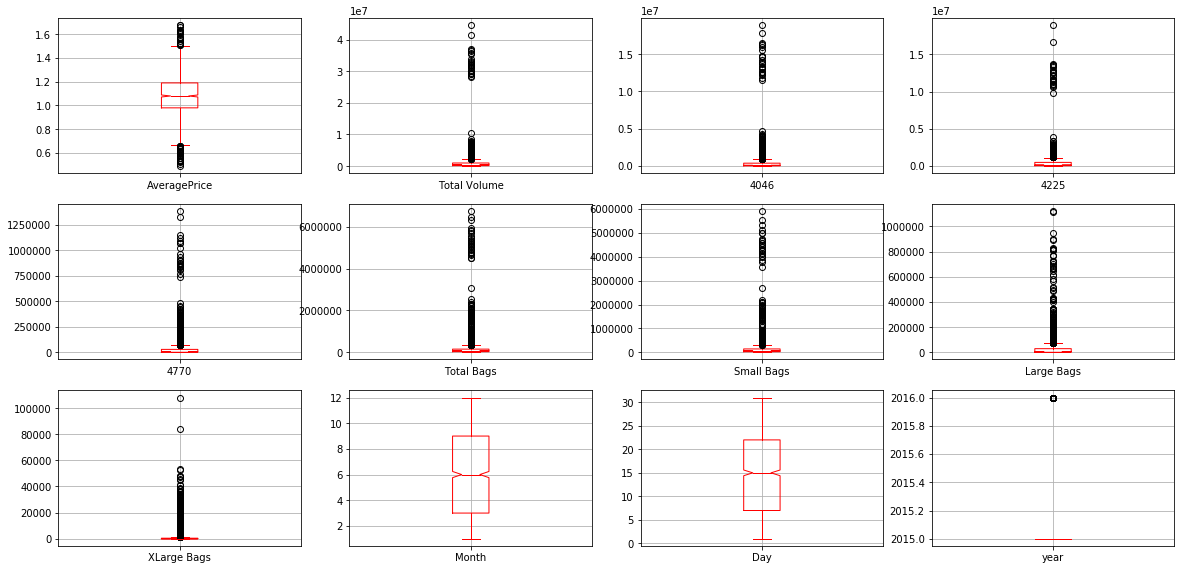

In [13]:
# Plotting the boxplot in order to check few statistical values and outliers
df_avocado.drop(['Date'],axis=1).plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True,notch=True,color='red' ,legend=True)

##### Conclusion from boxplot: Lots of outliers present.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E59DFFFE88>,
      dtype=object)

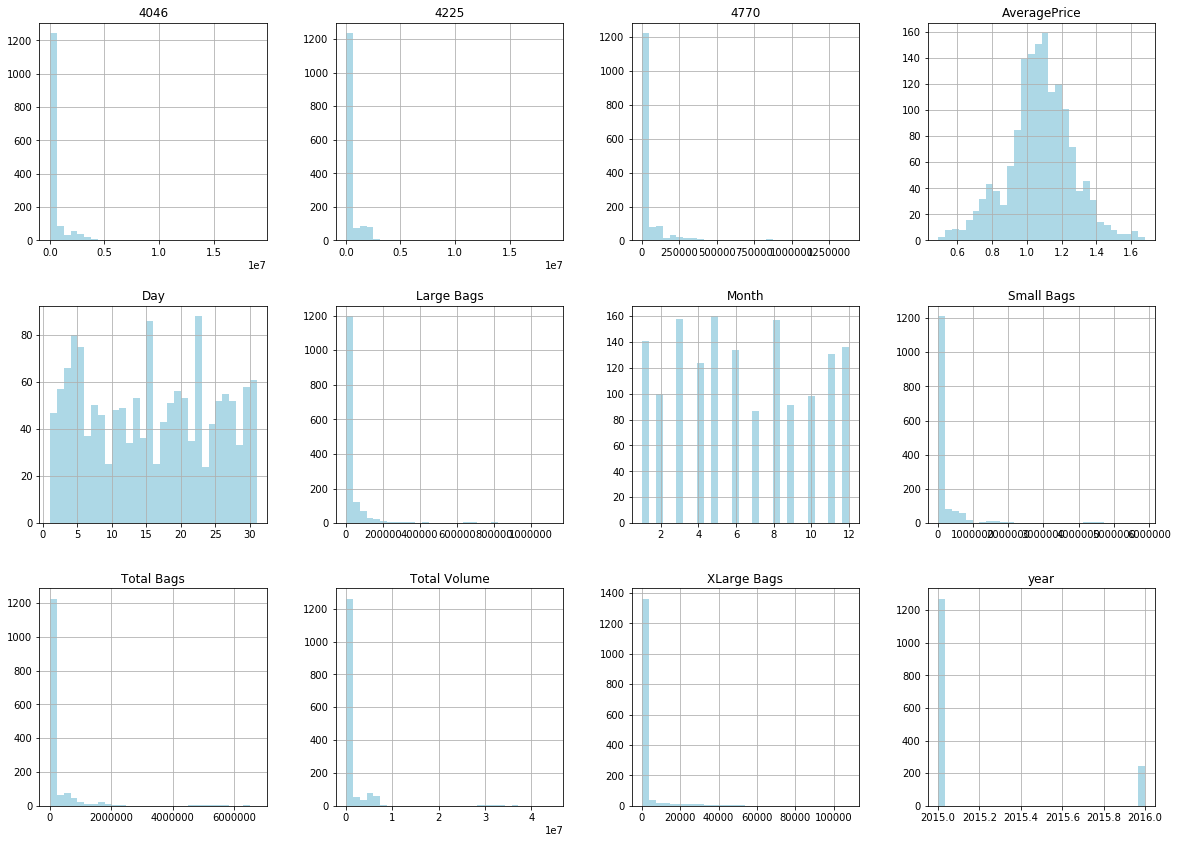

In [14]:
#Checking the Distribution using the histogram plot.
df_avocado.hist(figsize=(20,30),grid=True,layout=(6,4),bins=30,color='lightblue')

# Bivariant Plots:

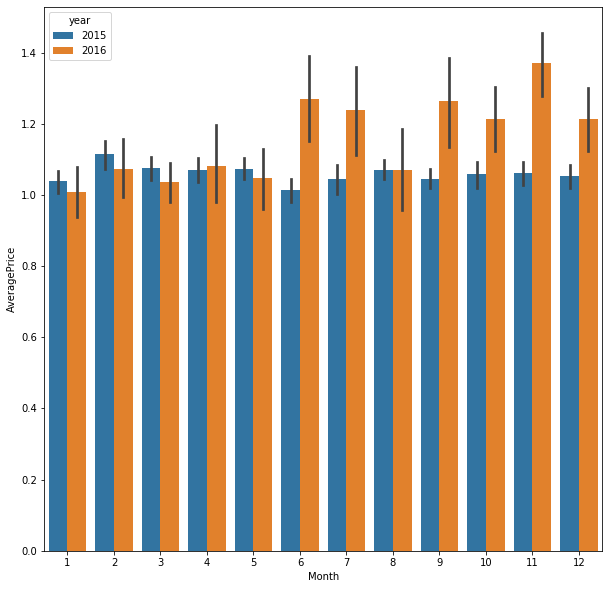

In [15]:
# Plotting Graph between Average price and month......
plt.figure(figsize=(10,10))
sns.barplot(x='Month',y='AveragePrice',data=df_avocado,hue='year')

##### Thus from the above graph we can see that :          

 >> In 2015 February is the month in which average price is more than rest.          
 >> In 2015 November is the month in which average price is more than rest.            
 >> In first five months average price is more in year 2015 as compared to 2016 but, in year 2016 from july to december the          average price is increased is way more higher than the price in 2015.....

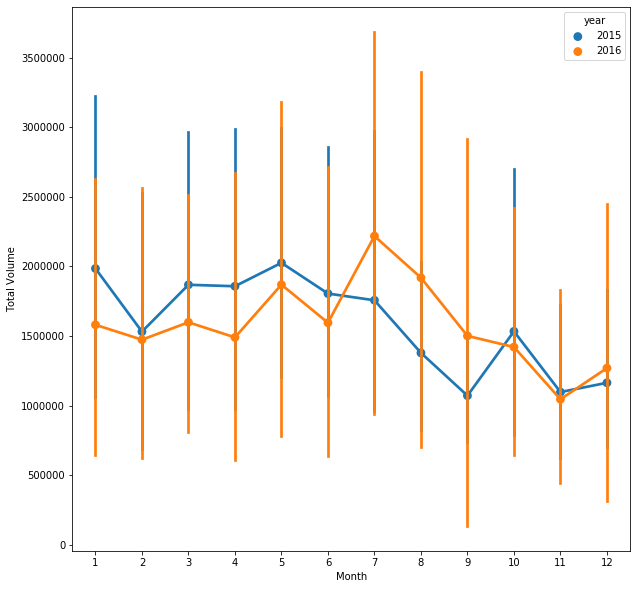

In [16]:
# Plotting Graph between Average price and month......
plt.figure(figsize=(10,10))
sns.pointplot(x='Month',y='Total Volume',data=df_avocado,hue='year',)

#### Conclusion from swarm plot:

>> Total volume consumption is more in year 2016 in month   july

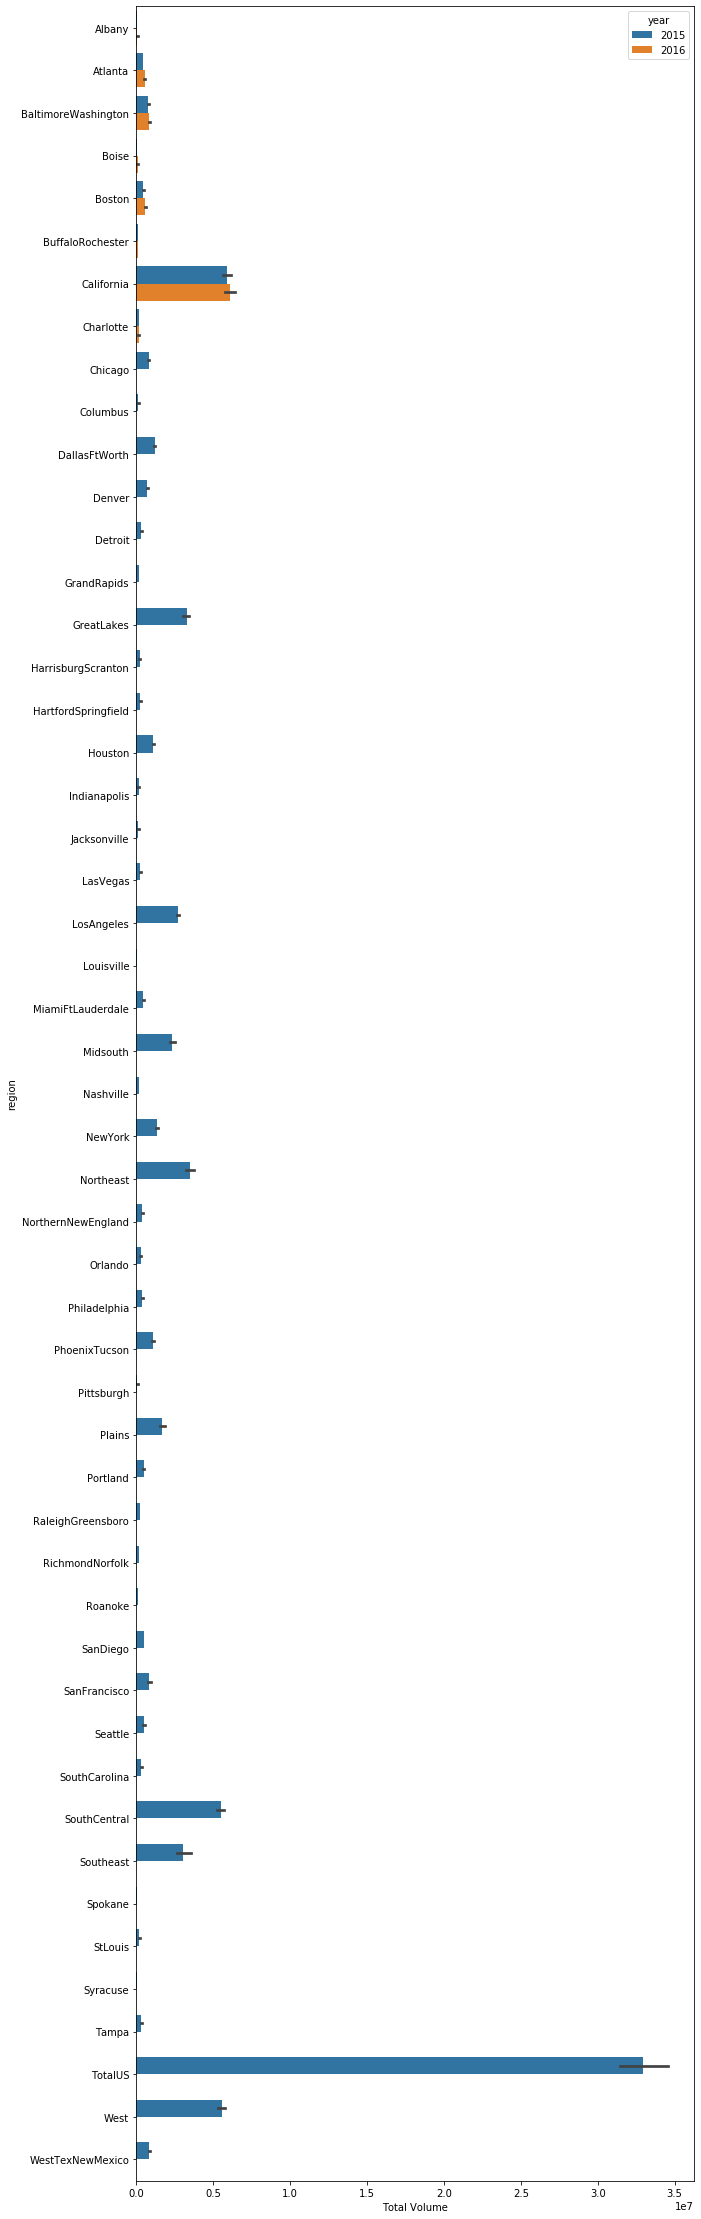

In [17]:
# Plotting Graph between Region and month......
plt.figure(figsize=(10,40))
sns.barplot(y='region',x='Total Volume',data=df_avocado,hue='year',)

#### Conclusion: 
>>In 2016 california and in 2015 total us is the largest consumer  of avocado

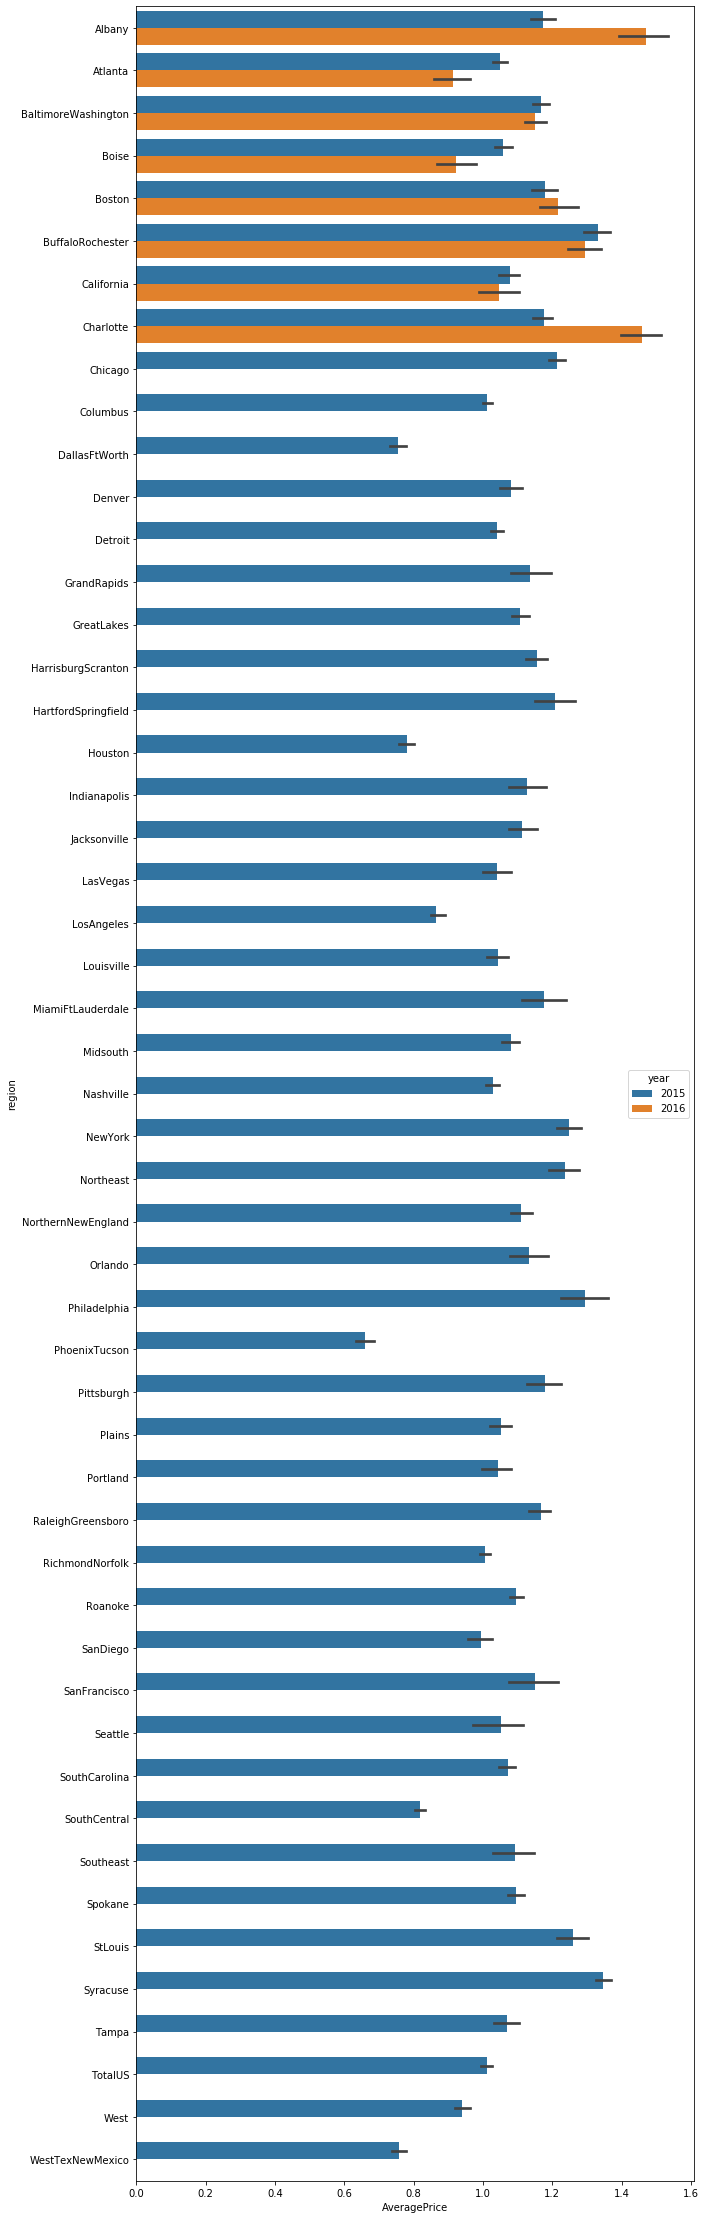

In [18]:
# Plot 
plt.figure(figsize=(10,40))
sns.barplot(y='region',x='AveragePrice',data=df_avocado,hue='year',)

##### conclusion:
Maximum value of average price in 2015 is in Syracuse.                      
Maximum value of average price in 2016 is in Albany.                         
Minimum value of average price in 2015 is in Phoenix Tucson.                     
Minimum value of average price in 2016 is in Atlanta.           

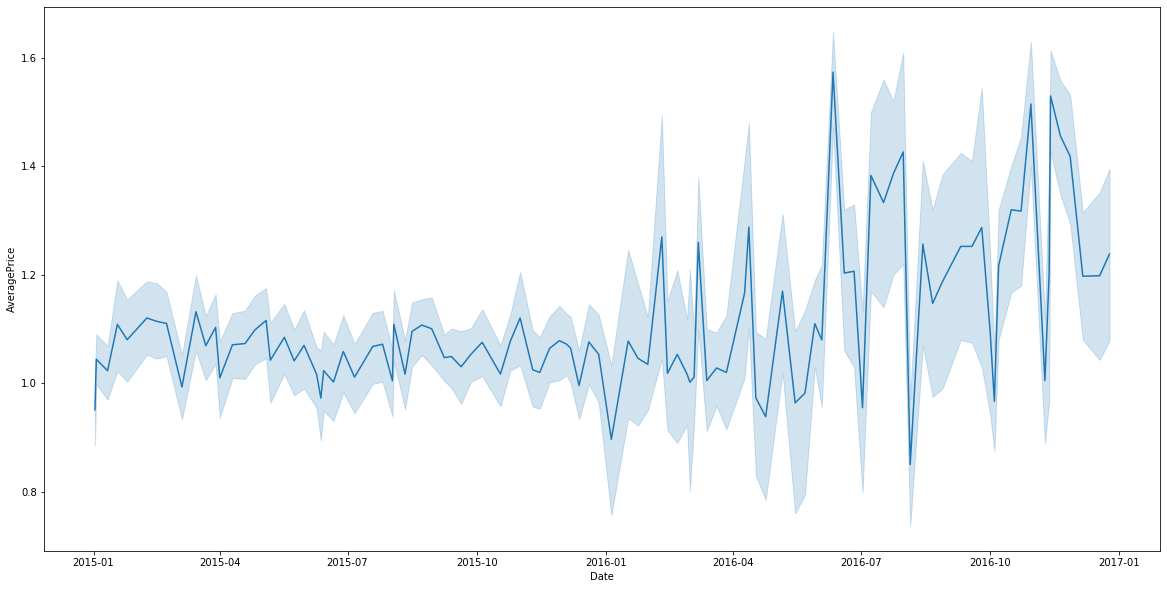

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(y='AveragePrice',x='Date',data=df_avocado)

##### Avocado consumption is increasing day by day( as if demand is more the price is more).

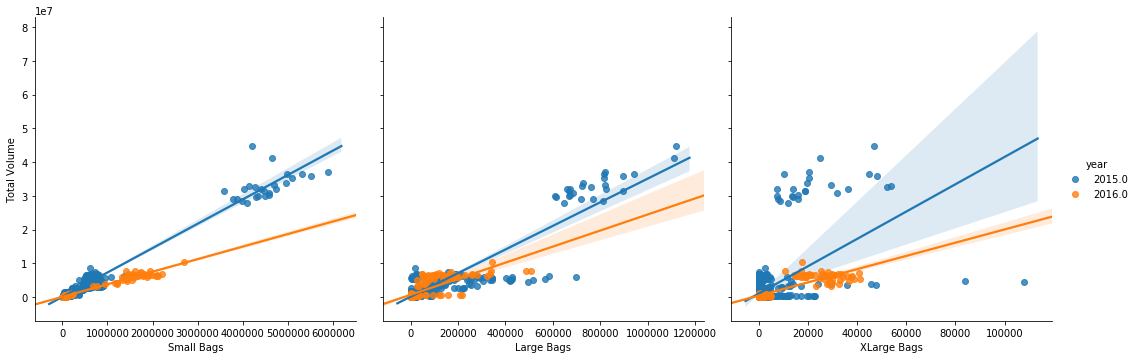

In [20]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg',hue='year')

##### Conclusion:                          
  >> Strong co-relation between Total Volume Vs all Bag( Small Bags', 'Large Bags', 'XLarge Bags) for year 2016.               
  >> small bags have better correlation then rest.                        
  >> Strong co-relation between Total Volume Vs bags( Small Bags', 'Large Bags') and weak correlation with XLarge bags for year      2015.                    

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

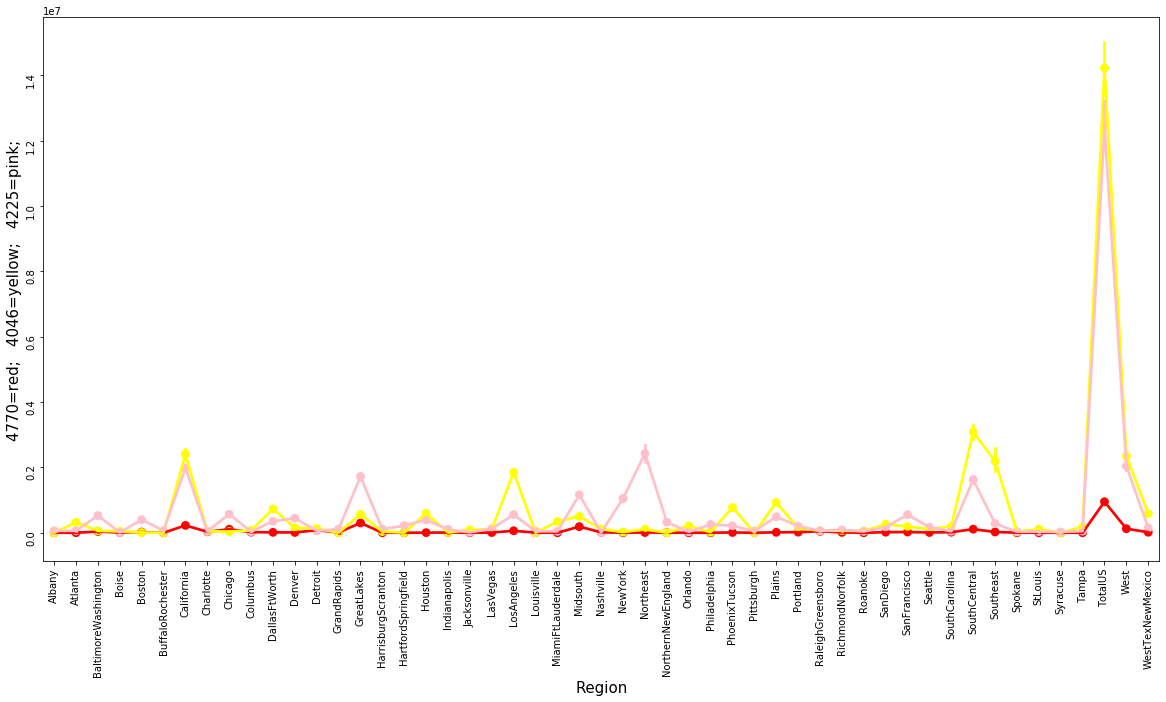

In [21]:
s=['4770', '4046', '4225']
plt.figure(figsize=(20,10))
sns.pointplot(y='4770',x='region',data=df_avocado,color='red',)
sns.pointplot(y='4046',x='region',data=df_avocado,color='yellow',)
sns.pointplot(y='4225',x='region',data=df_avocado,color='pink')
plt.xlabel('Region' ,fontsize=15)
plt.ylabel('4770=red;   4046=yellow;   4225=pink;' ,fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.tight_layout

##### Conclusion:  Highest number of Avocados with PLU code (4046,4225) are consumed in TotalUS region.

In [22]:
# Checking Skewness....
df_avocado.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
Month           0.101439
Day             0.041303
year            1.828332
dtype: float64

In [23]:
# using Label Encoding to change the value in binary format
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['type','region']
for val in list1:
    df_avocado[val]=le.fit_transform(df_avocado[val].astype(str))

In [26]:
# Dropping Date as it can't be assigned in skewness removal process.... 
df_avocado.drop(['Date'],axis=1,inplace=True)

In [27]:
# Removing Skewness
for i in df_avocado.columns:
    if df_avocado.skew().loc[i]>0.55:
        df_avocado[i]=np.log1p(df_avocado[i])

In [28]:
# Checking skewness again.... 
df_avocado.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
region          0.288146
Month           0.101439
Day             0.041303
year            1.828332
dtype: float64

In [29]:
# Checking the correlation...
df_avocado.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day,year
AveragePrice,1,-0.33,-0.51,-0.13,-0.29,-0.19,-0.15,-0.21,-0.065,nan,-0.23,0.061,0.093,0.18
Total Volume,-0.33,1,0.77,0.89,0.64,0.94,0.92,0.59,0.43,nan,0.2,-0.07,-0.049,0.0034
4046,-0.51,0.77,1,0.46,0.58,0.66,0.62,0.52,0.32,nan,0.32,-0.067,-0.038,-0.12
4225,-0.13,0.89,0.46,1,0.55,0.84,0.85,0.45,0.38,nan,0.13,-0.044,-0.048,0.0052
4770,-0.29,0.64,0.58,0.55,1,0.58,0.6,0.36,0.56,nan,0.053,-0.021,0.0018,0.0049
Total Bags,-0.19,0.94,0.66,0.84,0.58,1,0.99,0.59,0.49,nan,0.16,-0.053,-0.032,0.14
Small Bags,-0.15,0.92,0.62,0.85,0.6,0.99,1,0.5,0.48,nan,0.14,-0.058,-0.025,0.17
Large Bags,-0.21,0.59,0.52,0.45,0.36,0.59,0.5,1,0.28,nan,0.084,-0.038,-0.038,-0.11
XLarge Bags,-0.065,0.43,0.32,0.38,0.56,0.49,0.48,0.28,1,nan,-0.15,0.062,0.027,0.18
type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


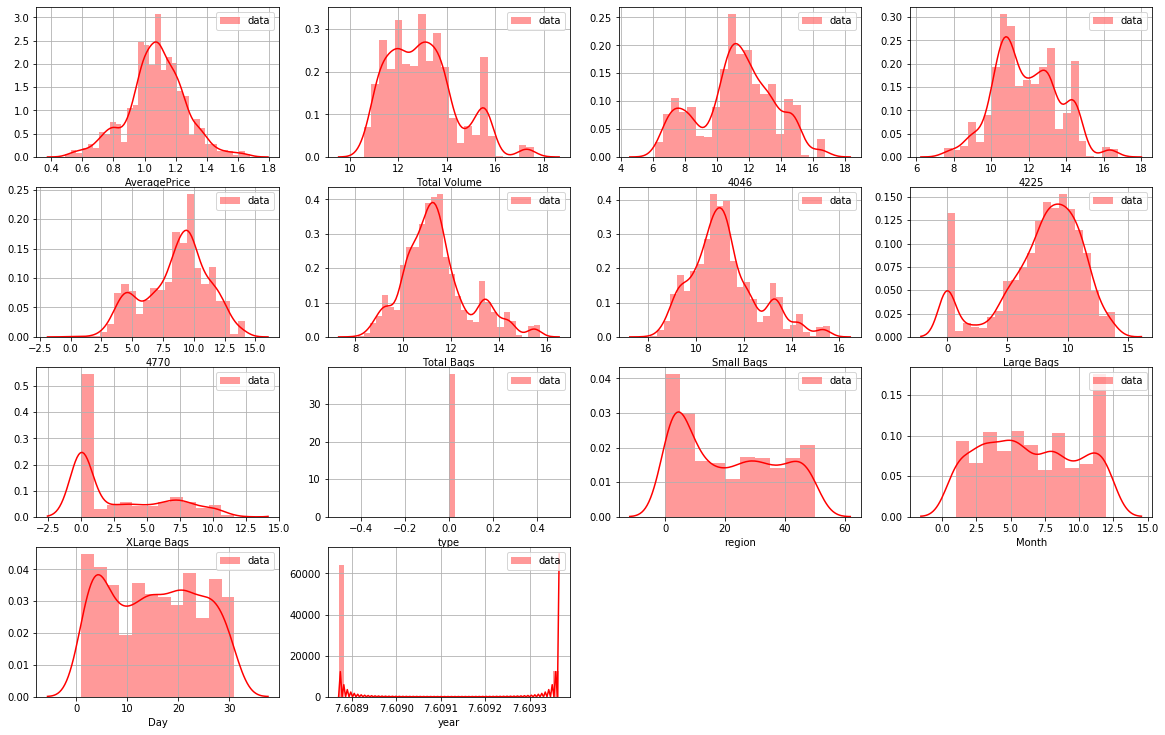

In [30]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_avocado.columns.values)):
    plt.subplot(5,4,i+1)
    sns.distplot(df_avocado[col],color='red',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [31]:
# Dropping the target value to fit the remaining data into standard scaler 
x1=df_avocado.drop(['AveragePrice','type','Day'],axis=1)
x1
print(x1.shape)

(1517, 11)


In [32]:
# Setting up the Target value in variable y.
y=df_avocado['AveragePrice']
y.shape

(1517,)

In [33]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,year
0,-1.356762,-1.828162,-0.567524,-1.810613,-1.684725,-1.539248,-0.966743,-0.810775,-1.314338,1.624154,-0.441008
1,-1.466387,-2.012069,-0.684233,-1.737594,-1.620123,-1.474983,-0.953861,-0.810775,-1.314338,1.624154,-0.441008
2,-0.932139,-1.941834,-0.159241,-1.428526,-1.732326,-1.587763,-0.937531,-0.810775,-1.314338,1.624154,-0.441008
3,-1.212820,-1.790572,-0.403726,-1.654003,-1.977653,-1.838106,-0.862073,-0.810775,-1.314338,-0.104453,-0.441008
4,-1.516851,-1.869374,-0.694856,-1.637471,-1.932480,-1.800022,-0.748414,-0.810775,-1.314338,1.336053,-0.441008
...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.598749,-0.109561,-0.547264,0.471494,-0.288452,-0.291023,0.408973,0.753079,-0.880286,1.047952,2.267532
1513,-0.646336,-0.230919,-0.592472,0.511204,-0.242463,-0.209250,0.354507,-0.810775,-0.880286,0.759850,2.267532
1514,-0.645653,-0.201904,-0.584607,0.453477,-0.252693,-0.227507,0.342751,1.103891,-0.880286,-1.256858,2.267532
1515,-0.605031,-0.135779,-0.576885,0.470688,-0.235255,-0.196878,0.343463,-0.810775,-0.880286,0.759850,2.267532


# MODEL TRAINING

In [34]:
#...........Function for GridSearch........
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(mod,parameters,scoring='r2' ,cv=5)
    clf.fit(x,y)
    print(clf.best_params_)
  

In [35]:
#.......Grid Search for SVR......
SV=SVR()
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters={'C': Cs, 'gamma' : gammas}
grid_cv(SV,parameters)

{'C': 0.1, 'gamma': 0.1}


In [36]:
#........Grid Search for KNeighborsRegressor......
knr=KNeighborsRegressor()
parameters={"n_neighbors":np.arange(1,100)}
grid_cv(knr,parameters)

{'n_neighbors': 48}


In [37]:
#...........Grid Search for Lasso.......
ls=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
grid_cv(ls,parameters)

{'alpha': 0.01}


In [38]:
#..............Grid Search for GradientBoostingRegressor...............
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbr,parameters)

{'learning_rate': 0.01, 'n_estimators': 100}


In [39]:
#.................Grid Search for RandomForestRegressor..........
rf=RandomForestRegressor()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters)

{'max_features': 'log2', 'n_estimators': 500}


In [40]:
#.......Gridsearchcv for Ada Boost Regressor...........
ada=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(ada,parameters,)

{'learning_rate': 0.1, 'n_estimators': 100}


In [41]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor(n_neighbors=48)
SV=SVR(C=0.1,gamma=0.1)
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor(max_features='log2',n_estimators=500)
GBR=GradientBoostingRegressor(learning_rate=0.1,n_estimators=10)
ABR=AdaBoostRegressor(learning_rate=0.1,n_estimators=100)
LS=Lasso(alpha=0.01)
RD=Ridge()
EN=ElasticNet()

In [42]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))

In [43]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [44]:
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error : ',mse )
    MSE.append(mse*100)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',rmse )
    RMSE.append(rmse*100)
    print('\n')
    
    
        


*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=48, p=2,
                    weights='uniform')


max r2 score corresponding to 82 is: 0.5370961496937288
Learning Score :  0.48284860584097933
R2 Score :  0.5370961496937288


Cross Val Score :  -0.1251431617535423


Mean Squared Error :  0.01698149471171418


Root Mean Squared Error :  0.13031306424036762


*************************** SVR *****************************


SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 92 is: 0.675662092814916
Learning Score :  0.6667131583519881
R2 Score :  0.675662092814916


Cross Val Score :  0.07954033556672994


Mean Squared Error :  0.01150182039919697


Root Mean Squared Error :  0.10724654026679355


***

In [45]:
#............. DataFrame to show all the calculated scores at one place........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE})  
result

,Model,Learning Score,R2_score,Cross_Val_Score,Mean_squared_error,Root_Mean_squared_error
0,KNeighborsRegressor,48.284861,53.709615,-12.514316,1.698149,13.031306
1,SVR,66.671316,67.566209,7.954034,1.150182,10.724654
2,LinearRegression,36.401721,46.674072,-0.271381,1.768148,13.297172
3,DecisionTreeRegressor,100.000000,76.756418,-109.706465,0.992204,9.960943
4,RandomForestRegressor,97.488779,86.336738,-4.746722,0.582335,7.631084
5,GradientBoostingRegressor,50.263345,52.514610,14.582224,1.682934,12.972795
6,AdaBoostRegressor,60.446630,61.314473,11.558019,1.347349,11.607537
7,Lasso,28.123779,33.583796,6.445073,2.208862,14.862240
8,Ridge,36.383657,46.324811,0.288705,1.779728,13.340646
9,ElasticNet,0.000000,-0.237717,-22.926303,3.851006,19.623980


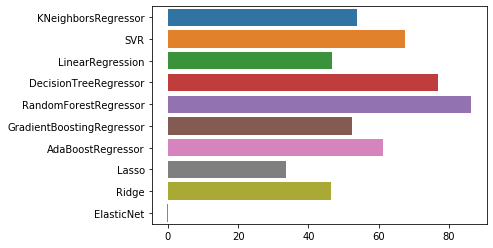

In [46]:
# ..........visualisation of Accuracy Score using Bar Plot..........
sns.barplot(y=Model,x=R2_score)

# After all this process conclusion is that RandomForestRegressor is performing better than rest as along r2_score it's error is better among all...

In [47]:
# Using RandomForestRegressor for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=87,test_size=.30,)
rf=RandomForestRegressor(max_features='log2',n_estimators=500)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('R2 Score : ',r2_score(y_test,rfpred))
print('Mean Squarred Error : ',mean_squared_error(y_test,rfpred))
print('Root Mean Squarred Error : ',np.sqrt(mean_squared_error(y_test,rfpred)))

R2 Score :  0.8434913531247321
Mean Squarred Error :  0.00613653464649125
Root Mean Squarred Error :  0.0783360367040052


In [48]:
# Printing predicted values
test=pd.DataFrame(data=y_test)
test['Predicted values']=rfpred
test

,AveragePrice,Predicted values
957,0.87,0.88200
1319,1.11,1.15224
1227,1.01,0.99410
480,1.09,1.13774
161,1.27,1.21534
...,...,...
1161,1.13,1.07600
911,1.05,1.04308
251,1.03,1.04864
1204,1.03,0.99806


In [49]:
# Saving the Predicted values in csv file
test.to_csv('Project_8_Avocado_1.csv',index=False) 

In [50]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(rf,'Project_8_Avocado_1.pkl')

['Project_8_Avocado_1.pkl']

In [51]:
# Loading predicted values.
final=joblib.load('Project_8_Avocado_1.pkl')
final.predict(x_test)

array([0.882  , 1.15224, 0.9941 , 1.13774, 1.21534, 1.3414 , 1.05828,
       0.78508, 1.03382, 0.95118, 1.34318, 1.076  , 1.13556, 0.8381 ,
       1.00674, 1.25206, 1.34866, 1.24778, 1.15376, 1.19992, 1.15538,
       1.38422, 1.08836, 1.15276, 1.06158, 1.08388, 1.0436 , 1.03008,
       1.07606, 1.08182, 1.02136, 1.37452, 1.33244, 0.92992, 0.7798 ,
       1.19692, 1.19124, 1.0451 , 1.20174, 1.19656, 1.1398 , 1.16204,
       1.06962, 0.84888, 1.0292 , 1.19452, 1.11146, 1.2038 , 1.29452,
       0.88736, 1.36902, 1.16586, 0.8322 , 1.11682, 1.15566, 1.20568,
       1.12086, 1.08004, 1.0267 , 1.18822, 1.13162, 1.0447 , 1.39598,
       0.83414, 1.1158 , 0.89018, 0.84564, 1.27456, 1.09726, 1.17654,
       0.99844, 1.13088, 1.1013 , 1.07238, 1.02062, 1.14888, 0.6292 ,
       1.17932, 1.02258, 1.36898, 1.29484, 1.09588, 1.2261 , 1.16396,
       1.17234, 1.00354, 0.73774, 1.19926, 1.0138 , 1.15238, 1.1541 ,
       1.0164 , 1.0049 , 0.93076, 0.76618, 0.66576, 1.01522, 1.11302,
       1.1984 , 1.11

### Conclusion:  (TASK 1)    
 
1) Highest number of Avocados with PLU code (4046,4225) are consumed in TotalUS region.         
2) Strong co-relation between Total Volume Vs all Bag( Small Bags', 'Large Bags', 'XLarge Bags) for year 2016.                 
3) small bags have better correlation then rest.              
4) Strong co-relation between Total Volume Vs bags( Small Bags', 'Large Bags') and weak correlation with XLarge bags for year       2015.                   
5) Avocado consumption is increasing day by day( as if demand is more the price is more).                 
6) In 2015 February is the month in which average price is more than rest.                           
7) In 2015 November is the month in which average price is more than rest.                              
8) In first five months average price is more in year 2015 as compared to 2016 but, in year 2016 from july to december the        average price is increased is way more higher than the price in 2015.                 
9) Total volume consumption is more in year 2016 in month july.           
10) Maximum value of average price in 2015 is in Syracuse.                              
11) Maximum value of average price in 2016 is in Albany.                                            
12) Minimum value of average price in 2015 is in Phoenix Tucson.                                
13) Minimum value of average price in 2016 is in Atlanta.  

### Steps Followed:       

1) Understanding Data.             
2) EDA Analysis.                           
3) Best parameters are found using Gridsearch cv and applied to models.                          
4) Best parameters are applied to each models and machine is trained for each models to find Best R2 Score, Cross val score,       mean squared error and root mean square error.             
5) A Result table is made comprises of r2, cross_val score, mean squared error and root mean square error of each model.  
6) RandomForestRegressor is used to train the model finally as it's r2_score is best and error is less among the rest of the models.   
7) Predicted values for (Task 1) are saved in Project_8_Avocado_1.csv file.     
8) Pickle file for (Task 1) is named with Project_8_Avocado_1 file.                 

# TASK 2 : Using the above EDA Analysis now we are setting up new Target as Region, and now as we can see it is categorical data i will use Classification Models here.

In [52]:
# Dropping the target value to fit the remaining data into standard scaler 
x2=df_avocado.drop(['region','type','Day'],axis=1)
x2
print(x2.shape)

(1517, 11)


In [53]:
# Setting up the Target value in variable y.
y3=df_avocado['region']
y3.shape

(1517,)

In [54]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x3=scale.fit_transform(x2)
x3=pd.DataFrame(x3,columns=x2.columns)
x3
# Thus we can infer that dataset becomes scaled.

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,year
0,1.350481,-1.356762,-1.828162,-0.567524,-1.810613,-1.684725,-1.539248,-0.966743,-0.810775,1.624154,-0.441008
1,1.456397,-1.466387,-2.012069,-0.684233,-1.737594,-1.620123,-1.474983,-0.953861,-0.810775,1.624154,-0.441008
2,-0.767838,-0.932139,-1.941834,-0.159241,-1.428526,-1.732326,-1.587763,-0.937531,-0.810775,1.624154,-0.441008
3,0.026531,-1.212820,-1.790572,-0.403726,-1.654003,-1.977653,-1.838106,-0.862073,-0.810775,-0.104453,-0.441008
4,1.085691,-1.516851,-1.869374,-0.694856,-1.637471,-1.932480,-1.800022,-0.748414,-0.810775,1.336053,-0.441008
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.668229,-0.598749,-0.109561,-0.547264,0.471494,-0.288452,-0.291023,0.408973,0.753079,1.047952,2.267532
1513,2.303724,-0.646336,-0.230919,-0.592472,0.511204,-0.242463,-0.209250,0.354507,-0.810775,0.759850,2.267532
1514,2.144850,-0.645653,-0.201904,-0.584607,0.453477,-0.252693,-0.227507,0.342751,1.103891,-1.256858,2.267532
1515,2.091892,-0.605031,-0.135779,-0.576885,0.470688,-0.235255,-0.196878,0.343463,-0.810775,0.759850,2.267532


# Model training for Task 2:

In [55]:
# .....................Importing Important libraries for Classification Models................
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring,):
    clf = GridSearchCV(mod,parameters,scoring, cv=5)
    clf.fit(x3,y3)
    print(clf.best_params_)

In [57]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy',)


{'criterion': 'entropy', 'max_depth': 10, 'random_state': 14}


In [58]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,200]}
grid_cv(gbc,parameters,'accuracy',)


{'learning_rate': 0.1, 'n_estimators': 200}


In [59]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy',)

{'n_neighbors': 1}


In [60]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4],}
grid_cv(svc,parameters,'accuracy',)

{'gamma': 0.001, 'random_state': 1}


In [61]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy',)

{'C': 100}


In [62]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy',)

{'max_features': 'log2', 'n_estimators': 200}


In [63]:
#     Grid Search for AdaBoostClassifier
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy',)

{'n_estimators': 200}


In [64]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=1)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=100)
DT=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=14)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)
RF=RandomForestClassifier(max_features= 'auto', n_estimators= 200,)
AD=AdaBoostClassifier(n_estimators=700,)

In [65]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))

In [66]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=.25,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [67]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.25,random_state=r_state,)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x3,y3,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

    

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  90 is: 0.9342105263157895


Learning Score :  1.0
Accuracy Score :  0.9342105263157895
Cross Val Score :  0.9012395876130354


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        19
           5       0.92      0.92      0.92        12
           6       1.00      1.00      1.00        18
           7       0.83      0.83      0.83         6
           8       1.00      1.00      1.0

Max Accuracy Score corresponding to Random State  76 is: 0.9184210526315789


Learning Score :  1.0
Accuracy Score :  0.9184210526315789
Cross Val Score :  0.8594756426840011


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       1.00      0.83      0.91        18
           2       1.00      1.00      1.00        20
           3       0.95      0.95      0.95        21
           4       0.94      1.00      0.97        15
           5       1.00      0.85      0.92        13
           6       0.91      0.91      0.91        11
           7       1.00      0.90      0.95        10
           8       1.00      1.00      1.00         6
           9       1.00      0.92      0.96        13
          10       1.00      0.67      0.80         6
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         5
          13       0.71      0.83      0.7

Max Accuracy Score corresponding to Random State  60 is: 0.9842105263157894


Learning Score :  1.0
Accuracy Score :  0.9789473684210527
Cross Val Score :  0.9553147043222415


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00        17
           3       1.00      0.95      0.97        20
           4       1.00      0.94      0.97        16
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.0

In [68]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result1=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs}) 
result1

,Model,Learning Score,Accuracy Score,Cross Val Score
0,KNeighborsClassifier,100.000000,93.421053,90.123959
1,SVC,23.834653,21.842105,17.829905
2,LogisticRegression,96.130167,93.684211,89.462796
3,DecisionTreeClassifier,100.000000,91.842105,85.947564
4,GaussianNB,91.029024,91.578947,87.508627
5,GradientBoostingClassifier,100.000000,91.842105,87.967694
6,RandomForestClassifier,100.000000,97.894737,95.531470
7,AdaBoostClassifier,19.085312,19.473684,10.237646


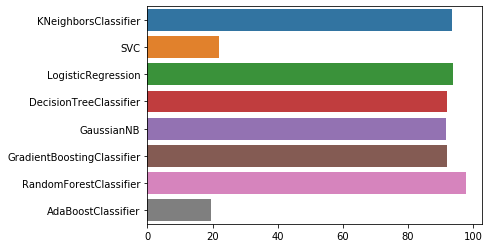

In [69]:
# ..........visualisation of Accuracy Score using Bar Plot..........
sns.barplot(y=Model,x=Acc_score)

#  After all this process conclusion is that RandomForestClassifier is performing well in terms of accuracy and cross_val_score among all...

In [70]:
# Using RandomForestClassifier for final model
x_train,x_test,y_train,y_test=train_test_split(x3,y3,random_state=69,test_size=.25)
rf=RandomForestClassifier(max_features= 'auto', n_estimators= 200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rfpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfpred))
print('Classification Report:',classification_report(y_test,rfpred))

Accuracy Score: 0.9868421052631579
Confusion Matrix: [[18  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  3]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.97        18
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        19
           7       1.00      0.89      0.94         9
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        12
          1

(50.0, 0.0)

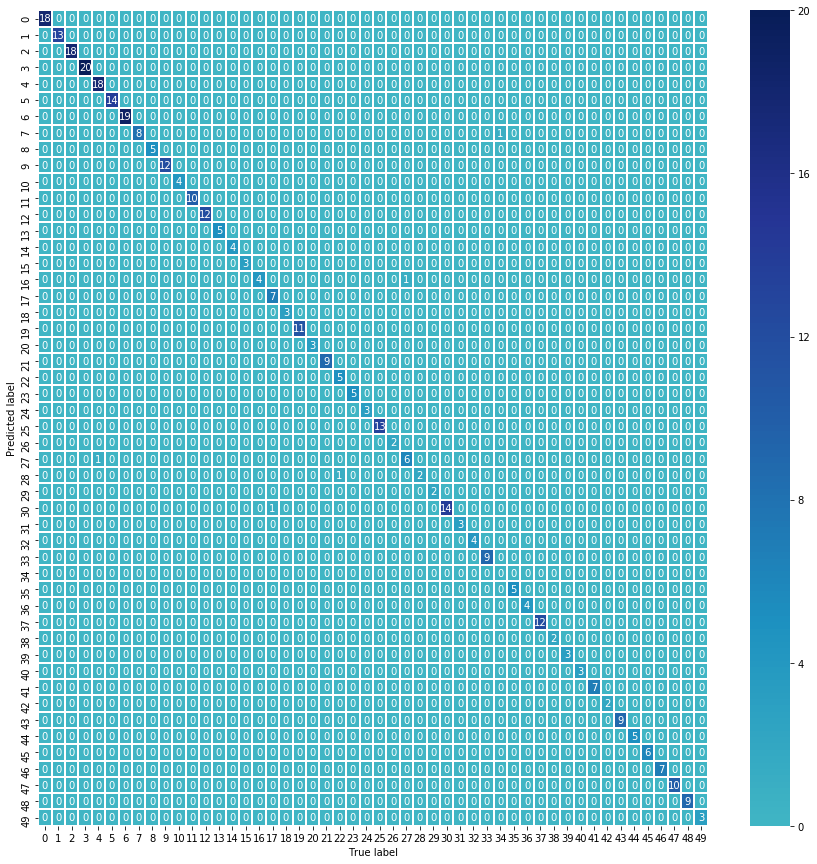

In [71]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test, rfpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [72]:
# Printing predicted values
test1=pd.DataFrame(data=y_test,)
test1['Predicted values']=rfpred
test1
# On the lest side values are those which are taken by machine for test...

,region,Predicted values
69,1,1
47,0,0
360,12,12
328,11,11
771,31,31
...,...,...
125,2,2
670,26,26
1194,48,48
1027,42,42


In [73]:
# Saving the Predicted values in csv file
test1.to_csv('Project_8_Avocado_2.csv') 

In [74]:
# Dumping data.
from sklearn.externals import joblib
joblib.dump(rf,'Project_8_Avocado_2.pkl')

['Project_8_Avocado_2.pkl']

In [75]:
# Loading predicted values.
final=joblib.load('Project_8_Avocado_2.pkl')
final.predict(x_test)

array([ 1,  0, 12, 11, 31, 22,  5,  2, 11, 37, 26,  3,  6, 31,  7, 46, 42,
       11, 11, 29,  5, 42, 12, 26, 14,  3,  0,  6, 17, 14, 49, 29, 44, 26,
       28, 32, 31, 12, 30, 50, 36, 12, 42,  4, 23, 31, 12,  9,  5, 15, 16,
       37, 31, 40,  7, 38,  6, 31, 19, 17, 47, 42, 20,  1, 24, 50,  5,  1,
        6, 19, 18, 11,  5, 28, 34,  5, 43,  2, 31, 26,  1,  0,  1, 11,  9,
       43, 34, 38, 34,  2,  2, 45,  0, 17, 19, 49,  6, 20,  3, 46, 14, 49,
       31,  2, 19, 34,  5,  6,  7, 28,  3, 49, 24,  0, 35, 13,  3,  9, 48,
        4, 46,  8, 48, 37, 27,  6,  4,  2, 38, 23, 46,  9,  3,  1, 13, 38,
       34, 18, 26,  9, 19,  3, 32, 41,  0, 17, 48,  6, 38,  0, 19, 22, 49,
        2, 26,  4,  4,  0, 33, 26, 17, 28, 26, 44,  0, 17, 11, 44, 49,  3,
       28, 41, 44, 13,  2,  3, 36, 48,  9,  4, 12, 10, 33, 38, 22, 46, 22,
        1, 33,  0, 49,  4, 44, 42, 19,  6, 16, 40, 17, 25,  1,  6, 32,  4,
        4, 48, 10,  2,  4, 12, 14,  5,  6,  7,  0, 39, 49, 23, 36,  0, 48,
       22,  5,  2,  6,  3


### Conclusion: (TASK 2)
1) Highest number of Avocados with PLU code (4046,4225) are consumed in TotalUS region.           
2) Strong co-relation between Total Volume Vs all Bag( Small Bags', 'Large Bags', 'XLarge Bags) for year 2016.                 
3) small bags have better correlation then rest.                   
4) Strong co-relation between Total Volume Vs bags( Small Bags', 'Large Bags') and weak correlation with XLarge bags for year 2015.                    
5) Avocado consumption is increasing day by day( as if demand is more the price is more).          
6) In 2015 February is the month in which average price is more than rest.                  
7) In 2015 November is the month in which average price is more than rest.                  
8) In first five months average price is more in year 2015 as compared to 2016 but, in year 2016 from july to december the average price is increased is way more higher than the price in 2015.            
9) Total volume consumption is more in year 2016 in month july.                 
10) Maximum value of average price in 2015 is in Syracuse.                 
11) Maximum value of average price in 2016 is in Albany.                 
12) Minimum value of average price in 2015 is in Phoenix Tucson.                   
13) Minimum value of average price in 2016 is in Atlanta.          

### Steps Followed:          
1) Understanding Data.               
2) EDA Analysis.                      
3) Best parameters are found using Gridsearch cv and applied to models.                         
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score, Cross val score.                            
5) A Result table is made comprises of accuracy, cross_val score of each model.      
6) RandomForestClassifier is used to train the model finally as it's r2_score is best and error is less among the rest of the models.    
7) Predicted values for (Task 2) are saved in Project_8_Avocado_2.csv file.              
8) Pickle file for (Task 2) is named with Project_8_Avocado_2.pkl file.                